# USING CHURN MODELLING DATASET
The task is to predict whether a customer exited the bank
using all other variables as features. The current script
deals with data cleaning and feature engineering.

In [11]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# importing the data
dataset = pd.read_csv("Churn_Modelling.csv")
print(dataset.head())
print(dataset.shape)

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  
(10000, 13)


#### As seen from the above, the dataset has 10000 observations and one of the 13
#### features ("Exited") is the dependent variable

In [13]:
# removing un-wanted columns
df = dataset.drop(columns=["CustomerId", "Surname"], axis=1)
print(df.shape)

(10000, 11)


In [14]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
# extracting categorical features
colnames = df.columns
print(colnames)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [16]:
# categorical features
cat_features = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
df_cont = df.drop([i for i in cat_features], axis = 1)
# df_cont["Exited"] = df["Exited"]
print(df_cont.head())
df_cat = df.loc[:,cat_features]
print(df_cat.head())

   CreditScore  Age  Tenure    Balance  EstimatedSalary
0          619   42       2       0.00        101348.88
1          608   41       1   83807.86        112542.58
2          502   42       8  159660.80        113931.57
3          699   39       1       0.00         93826.63
4          850   43       2  125510.82         79084.10
  Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited
0    France  Female              1          1               1       1
1     Spain  Female              1          0               1       0
2    France  Female              3          1               0       1
3    France  Female              2          0               0       0
4     Spain  Female              1          1               1       0


### Feature engineering with contiuous features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_cont_scaled = pd.DataFrame(data = scaler.fit_transform(df_cont), columns=["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"])


In [18]:
df_cont_scaled.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,-1.536794,0.293517,1.032908,1.333053,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.365276


(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([-1.22584767, -0.82373057, -0.42161347, -0.01949637,  0.38262073,
         0.78473783,  1.18685492,  1.58897202,  1.99108912,  2.39320622,
         2.79532332]),
 <BarContainer object of 10 artists>)

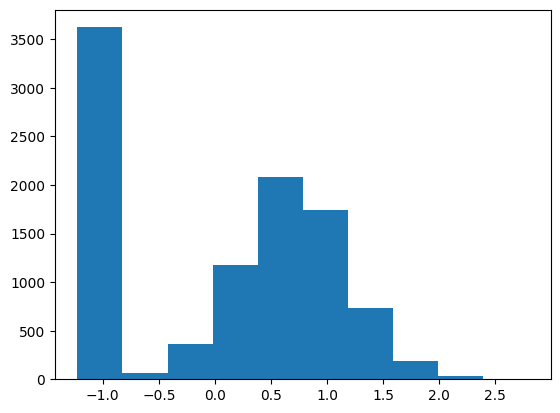

In [19]:
plt.hist(df_cont_scaled["Balance"])


(array([3.623e+03, 6.900e+01, 3.600e+02, 1.173e+03, 2.081e+03, 1.747e+03,
        7.290e+02, 1.860e+02, 3.000e+01, 2.000e+00]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <BarContainer object of 10 artists>)

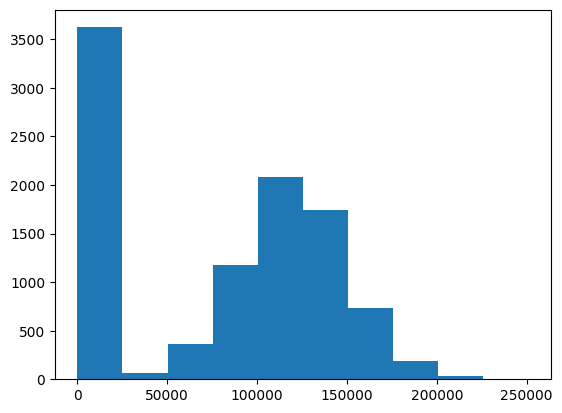

In [20]:
plt.hist(df_cont["Balance"])

In [21]:
# merging dataframes
df_cleaned = pd.concat([df_cat, df_cont_scaled], axis=1)
print(df_cleaned.head())

  Geography  Gender  NumOfProducts  HasCrCard  IsActiveMember  Exited  \
0    France  Female              1          1               1       1   
1     Spain  Female              1          0               1       0   
2    France  Female              3          1               0       1   
3    France  Female              2          0               0       0   
4     Spain  Female              1          1               1       0   

   CreditScore       Age    Tenure   Balance  EstimatedSalary  
0    -0.326221  0.293517 -1.041760 -1.225848         0.021886  
1    -0.440036  0.198164 -1.387538  0.117350         0.216534  
2    -1.536794  0.293517  1.032908  1.333053         0.240687  
3     0.501521  0.007457 -1.387538 -1.225848        -0.108918  
4     2.063884  0.388871 -1.041760  0.785728        -0.365276  


In [22]:
# writing to a CSV file
df_cleaned.to_csv("Churn_Modelling_cleaned.csv", index=False)

The cleaned dataset is used for EDA using R